In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from photometry_preprocessing import * 
from photometry_smoothing import *
from photometry_correcting import * 
from photometry_eventanalysis import * 
from photometry_variationanalysis import *
from photometry_visualization import * 
from scalebars import *
import deeplabcut_returnanalysis as dlcra 
import pandas as pd 
import warnings
import functools
import operator
from matplotlib.lines import Line2D
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#All paths 

tail_pick_fasted = ['/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-rf-stress-05092022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-tailpicking_300s-08032022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#2-tailpicking_300s-08032022']
tail_pick_fasted_times = {'/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-rf-stress-05092022': 300,
              '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-tailpicking_300s-08032022': 302,
              '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#2-tailpicking_300s-08032022': 300}

food_drop_fasted_old = ['/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-fd-05082022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-fooddrop_fasted_600s-08052022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-fooddrop_fasted_600s-08072022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#2-fooddrop_fasted_600s-08052022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#2-fooddrop_fasted_600s-08072022']
food_drop_fasted = ['/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-fd-05082022', #to exclude 1 
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-fooddrop_fasted_600s-08072022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#2-fooddrop_fasted_600s-08072022']
food_drop_fasted_drop = {'/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-fd-05082022': 601,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-fooddrop_fasted_600s-08052022': 600,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-fooddrop_fasted_600s-08072022': 601,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#2-fooddrop_fasted_600s-08052022': 601,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#2-fooddrop_fasted_600s-08072022': 601}
food_drop_fasted_eat = {'/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-fd-05082022': 626,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-fooddrop_fasted_600s-08052022': 663,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-fooddrop_fasted_600s-08072022': 639,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#2-fooddrop_fasted_600s-08052022': 636,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#2-fooddrop_fasted_600s-08072022': 627}

food_drop_unfasted = ['/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-fd-rf-05092022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-fooddrop_nonfasted_600s-08062022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#2-fooddrop_nonfasted_600s-08062022']
food_drop_unfasted_drop = {'/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-fd-rf-05092022': 602,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-fooddrop_nonfasted_600s-08062022': 603,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#2-fooddrop_nonfasted_600s-08062022': 602}
food_drop_unfasted_eat = {'/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-fd-rf-05092022': 666,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-fooddrop_nonfasted_600s-08062022': 616}

ob_drop_fasted = ['/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-fasted-obdrop-05212022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-Obdrop_fasted_600s-08072022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#2-Obdrop_fasted_600s-08072022']
ob_drop_fasted_drop = {'/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-fasted-obdrop-05212022': 602,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-Obdrop_fasted_600s-08072022': 601,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#2-Obdrop_fasted_600s-08072022': 601}

ob_drop_unfasted = ['/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-non_fasted-obdrop-05222022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-Obdrop_nonfasted_600s-08082022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#2-Obdrop_nonfasted_600s-08082022']
ob_drop_unfasted_drop = {'/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-non_fasted-obdrop-05222022': 602,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-Obdrop_nonfasted_600s-08082022': 601,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#2-Obdrop_nonfasted_600s-08082022': 601}

tea_ball_food_fasted = ['/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-teaballdrop_fasted_600s_1800s-08092022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#2-teaballdrop_fasted_600s_1800s-08092022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-fasted-tb-05152022']
tea_ball_food_fasted_inaccessible = {'/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-teaballdrop_fasted_600s_1800s-08092022': 601,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#2-teaballdrop_fasted_600s_1800s-08092022': 600,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-fasted-tb-05152022': 602}
tea_ball_food_fasted_accessible = {'/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-teaballdrop_fasted_600s_1800s-08092022': 1802,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#2-teaballdrop_fasted_600s_1800s-08092022': 1803,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-fasted-tb-05152022': 1801}

tea_ball_object_fasted = ['/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-fasted-tb-object-05242022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-teaballdrop(object)_fasted_600s_1800s-08112022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#2-teaballdrop(object)_fasted_600s_1800s-08112022']
tea_ball_object_fasted_inaccessible = {'/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-fasted-tb-object-05242022': 601,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-teaballdrop(object)_fasted_600s_1800s-08112022': 600,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#2-teaballdrop(object)_fasted_600s_1800s-08112022': 601}
tea_ball_object_fasted_accessible = {'/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-fasted-tb-object-05242022': 1816,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-teaballdrop(object)_fasted_600s_1800s-08112022': 1801,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#2-teaballdrop(object)_fasted_600s_1800s-08112022': 1805}

tea_ball_food_unfasted = ['/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-unfasted-tb-05162022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-teaballdrop(food)_nonfasted_600s_1800s-08102022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#2-teaballdrop(food)_nonfasted_600s_1800s-08102022']
tea_ball_food_unfasted_inaccessible = {'/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-unfasted-tb-05162022': 600,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-teaballdrop(food)_nonfasted_600s_1800s-08102022': 602,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#2-teaballdrop(food)_nonfasted_600s_1800s-08102022': 603}
tea_ball_food_unfasted_accessible = {'/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-unfasted-tb-05162022': 1829,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-teaballdrop(food)_nonfasted_600s_1800s-08102022': 1802,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#2-teaballdrop(food)_nonfasted_600s_1800s-08102022': 1804}

tea_ball_object_unfasted = ['/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-unfasted-tb-object-05232022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-teaballdrop(object)_nonfasted_600s_1800s-08102022',
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#2-teaballdrop(object)_nonfasted_600s_1800s-08102022']
tea_ball_object_unfasted_inaccessible = {'/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-unfasted-tb-object-05232022': 601,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-teaballdrop(object)_nonfasted_600s_1800s-08102022': 601,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#2-teaballdrop(object)_nonfasted_600s_1800s-08102022': 600}
tea_ball_object_unfasted_accessible = {'/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-109-unfasted-tb-object-05232022': 1809,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#1-teaballdrop(object)_nonfasted_600s_1800s-08102022': 1806,
    '/scratch/rhs112/PVN_GLP1R/retro-gcamp6f-DMV-PVN-#2-teaballdrop(object)_nonfasted_600s_1800s-08102022': 1801}

In [ ]:
#Process TDT block 
paths = [tail_pick_fasted,food_drop_fasted_old,food_drop_unfasted,ob_drop_fasted,ob_drop_unfasted,tea_ball_food_fasted, tea_ball_object_fasted,tea_ball_food_unfasted,tea_ball_object_unfasted]
paths = [path for path in paths]
for path in paths: 
    time, signal, isos, streamrate = preprocess_data(path, savetime=True, savesignal=True, saveisos=True, savestreamrate=True,
            annotationstyle='none', offsettime=5)



In [ ]:
paths = food_drop_fasted
epocs_dict = food_drop_fasted_drop
savefilename = 'FoodDropData.h5'

for path in paths:
    signal = np.load(f'{path}/signal.npy')
    isos = np.load(f'{path}/isos.npy')
    time = np.load(f'{path}/time.npy')
    streamrate = np.load(f'{path}/streamrate.npy')
    
    
    smooth_signal = moving_average(signal)
    smooth_isos = moving_average(isos)
    ds_time = time[::int(streamrate/10)]
    ds_signal = smooth_signal[::int(streamrate/10)]
    ds_isos = smooth_isos[::int(streamrate/10)]

    scaled_isos = linear_fitting(ds_isos, ds_signal, 'simple')
    dFF = delta_FF(scaled_isos, ds_signal, method='unstandardized')
    zdFF = normalize_channel(dFF, ds_time, method='mean')
    
    epoc = [epocs_dict[path] - 5 ]
    savepath = f'{path}/{savefilename}'

    df, mean, sem = event_analysis(time=ds_time, data=dFF, epochs=epoc,shade='sem', saveresults=True, savepath=savepath, method='baseline_subtraction', baseline_start=-20, baseline_end=-10, view_window=[-240, 300])
    fig, ax = plt.subplots(figsize=(8,5)) 
    visualize_event(ax, df, mean, sem, f'{path.rsplit("/")[-1]}', [-240, 300])
    ax.set_xticks([-240, -120, 0, 120, 240])
    ax.set_xticklabels([-4, -2, 0, 2, 4])
    ax.set_xlabel('Minutes')
    ax.axvline(0, ymin=0.05, color='black', linewidth=0.5, linestyle='--', alpha=0.5)

In [ ]:
behaviorfileending = '/FoodDropData.h5'

df, initmean, sem = group_analysis(paths, behaviorfileending, shade='sem')
mean = initmean[:-1]
df = df.dropna()
sem = sem[:-1]

fig, ax = plt.subplots(1, figsize=(10,5))

view_window=[-240, 300]
time = np.linspace(view_window[0], view_window[1], num=len(mean))
mean = mean
ax.plot(time, mean, linewidth=0.5, color='green', alpha=0.6)
ax.fill_between(time, mean-sem, mean+sem, color='green', alpha=0.1)
n = len(df.columns)

legend_elements = [Line2D([0], [0], color = 'green', lw=3, label=f'GCaMP, n={n}')]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, handlelength=0.75, handleheight=1, edgecolor=None)
fig.subplots_adjust(right=0.7)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.axvline(0, ymin=0.05, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
ax.text(0, -2.25, '0')
#plt.suptitle('Onset of Feeding Bout',x=0.45, y=0.95)
sb = add_scalebar(ax, matchx=False, sizex=5, labelx='5 seconds', matchy=False, sep=4, sizey=1, labely='1 z-score',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))


In [ ]:
#Fasted 
behaviorfileending = '/FoodDropData.h5'
dff, initmean, fsem = group_analysis(food_drop_fasted, behaviorfileending, shade='sem')
fmean = initmean[:-1]
dff = dff.dropna()
fsem = fsem[:-1]


behaviorfileending = '/ObDropData.h5'
odf, initmean, osem = group_analysis(ob_drop_fasted, behaviorfileending, shade='sem')
omean = initmean[:-1]
odf = odf.dropna()
osem = osem[:-1]


fig, ax = plt.subplots(1, figsize=(10,5))

view_window=[-240, 300]
ftime = np.linspace(view_window[0], view_window[1], num=len(fmean))
fmean = fmean
ax.plot(ftime, fmean, linewidth=0.5, color='green', alpha=0.6)
ax.fill_between(ftime, fmean-fsem, fmean+fsem, color='green', alpha=0.1)
fn = len(dff.columns)

otime = np.linspace(view_window[0], view_window[1], num=len(omean))
omean = omean - 0.7
ax.plot(otime, omean, linewidth=0.5, color='dimgray', alpha=0.6)
ax.fill_between(otime, omean-osem, omean+osem, color='dimgray', alpha=0.1)
on = len(odf.columns)


legend_elements = [Line2D([0], [0], color = 'green', lw=3, label=f'Food, n={fn}'), Line2D([0], [0], color = 'black', lw=3, label=f'Object, n={on}')]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, handlelength=0.75, handleheight=1, edgecolor=None)
fig.subplots_adjust(right=0.7)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.axvline(0, ymin=0.05, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
ax.text(-60, -3.55, 'Drop (Fasted)')
#plt.suptitle('Onset of Feeding Bout',x=0.45, y=0.95)
sb = add_scalebar(ax, matchx=False, sizex=60, labelx='1 Minute', matchy=False, sep=4, sizey=1, labely='1 z-score',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))



In [ ]:
# ============================================================================================================================

In [ ]:
# ------------------ FASTED FOOD DROP 

In [ ]:
for path in food_drop_fasted:
    signal = np.load(f'{path}/signal.npy')
    isos = np.load(f'{path}/isos.npy')
    time = np.load(f'{path}/time.npy')
    streamrate = np.load(f'{path}/streamrate.npy')
    
    
    smooth_signal = moving_average(signal)
    smooth_isos = moving_average(isos)
    ds_time = time[::int(streamrate/10)]
    ds_signal = smooth_signal[::int(streamrate/10)]
    ds_isos = smooth_isos[::int(streamrate/10)]
    
    #dFF = normalize_channel(ds_signal, ds_time, method='baselineperiod', baseline_start=300, baseline_end=600)
    
    
    scaled_isos = linear_fitting(ds_isos, ds_signal, 'simple')
    dFF = delta_FF(scaled_isos, ds_signal, method='unstandardized')
    zdFF = normalize_channel(dFF, ds_time, method='mean')
    
    epoc = [food_drop_fasted_drop[path] - 5 ]
    savepath = f'{path}/FoodDropData.h5'
    df, mean, sem = event_analysis(time=ds_time, data=dFF, epochs=epoc,shade='sem', saveresults=True, savepath=savepath, method='baseline_subtraction', baseline_start=-20, baseline_end=-10, view_window=[-240, 300])
    fig, ax = plt.subplots(figsize=(8,5)) 
    visualize_event(ax, df, mean, sem, f'{path.rsplit("/")[-1]}', [-240, 300])
    ax.set_xticks([-240, -120, 0, 120, 240])
    ax.set_xticklabels([-4, -2, 0, 2, 4])
    ax.set_xlabel('Minutes')
    ax.axvline(0, ymin=0.05, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
    
    
    
    

In [ ]:

behaviorfileending = '/FoodDropData.h5'

df, initmean, sem = group_analysis(food_drop_fasted, behaviorfileending, shade='sem')
mean = initmean[:-1]
df = df.dropna()
sem = sem[:-1]

In [ ]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(10,5))

view_window=[-240, 300]
time = np.linspace(view_window[0], view_window[1], num=len(mean))
mean = mean
ax.plot(time, mean, linewidth=0.5, color='green', alpha=0.6)
ax.fill_between(time, mean-sem, mean+sem, color='green', alpha=0.1)
n = len(df.columns)

legend_elements = [Line2D([0], [0], color = 'green', lw=3, label=f'GCaMP, n={n}')]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, handlelength=0.75, handleheight=1, edgecolor=None)
fig.subplots_adjust(right=0.7)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.axvline(0, ymin=0.05, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
ax.text(-50, -1.55, 'Food Drop (Fasted)')
#plt.suptitle('Onset of Feeding Bout',x=0.45, y=0.95)
sb = add_scalebar(ax, matchx=False, sizex=60, labelx='1 minute', matchy=False, sep=4, sizey=1, labely='1 z-score',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))




In [ ]:
# ---------------------------------- UNFASTED FOOD DROP 

In [ ]:
for path in food_drop_unfasted:
    signal = np.load(f'{path}/signal.npy')
    isos = np.load(f'{path}/isos.npy')
    time = np.load(f'{path}/time.npy')
    streamrate = np.load(f'{path}/streamrate.npy')
    
    smooth_signal = moving_average(signal)
    smooth_isos = moving_average(isos)
    ds_time = time[::int(streamrate/10)]
    ds_signal = smooth_signal[::int(streamrate/10)]
    ds_isos = smooth_isos[::int(streamrate/10)]
    
    scaled_isos = linear_fitting(ds_isos, ds_signal, 'simple')
    dFF = delta_FF(scaled_isos, ds_signal, method='unstandardized')
    zdFF = normalize_channel(dFF, ds_time, method='mean')
    epoc = [food_drop_unfasted_drop[path] - 5 ]
    savepath = f'{path}/FoodDropData.h5'
    df, mean, sem = event_analysis(time=ds_time, data=zdFF, epochs=epoc,shade='sem', saveresults=True, savepath=savepath, method='baseline_subtraction', baseline_start=-20, baseline_end=-10, view_window=[-240, 300])
    fig, ax = plt.subplots(figsize=(8,5)) 
    visualize_event(ax, df, mean, sem, f'{path.rsplit("/")[-1]}', [-240, 300])
    ax.set_xticks([-240, -120, 0, 120, 240])
    ax.set_xticklabels([-4, -2, 0, 2, 4])
    ax.set_xlabel('Minutes')
    ax.axvline(0, ymin=0.05, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
    
    
    

In [ ]:

behaviorfileending = '/FoodDropData.h5'

df, initmean, sem = group_analysis(food_drop_unfasted, behaviorfileending, shade='sem')
mean = initmean[:-1]
df = df.dropna()
sem = sem[:-1]

In [ ]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(10,5))

view_window=[-240, 300]
time = np.linspace(view_window[0], view_window[1], num=len(mean))
mean = mean
ax.plot(time, mean, linewidth=0.5, color='green', alpha=0.6)
ax.fill_between(time, mean-sem, mean+sem, color='green', alpha=0.1)
n = len(df.columns)

legend_elements = [Line2D([0], [0], color = 'green', lw=3, label=f'GCaMP, n={n}')]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, handlelength=0.75, handleheight=1, edgecolor=None)
fig.subplots_adjust(right=0.7)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.axvline(0, ymin=0.05, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
ax.text(-60, -3.25, 'Food Drop (Unfasted)')
#plt.suptitle('Onset of Feeding Bout',x=0.45, y=0.95)
sb = add_scalebar(ax, matchx=False, sizex=60, labelx='1 Minute', matchy=False, sep=4, sizey=1, labely='1 z-score',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))




In [ ]:
#-------------------- FASTED OBJECT DROP 

In [ ]:
for path in ob_drop_fasted:
    signal = np.load(f'{path}/signal.npy')
    isos = np.load(f'{path}/isos.npy')
    time = np.load(f'{path}/time.npy')
    streamrate = np.load(f'{path}/streamrate.npy')
    
    smooth_signal = moving_average(signal)
    smooth_isos = moving_average(isos)
    ds_time = time[::int(streamrate/10)]
    ds_signal = smooth_signal[::int(streamrate/10)]
    ds_isos = smooth_isos[::int(streamrate/10)]
    
    scaled_isos = linear_fitting(ds_isos, ds_signal, 'simple')
    dFF = delta_FF(scaled_isos, ds_signal, method='unstandardized')
    zdFF = normalize_channel(dFF, ds_time, method='mean')
    epoc = [ob_drop_fasted_drop[path] - 5 ]
    savepath = f'{path}/ObDropData.h5'
    df, mean, sem = event_analysis(time=ds_time, data=zdFF, epochs=epoc,shade='sem', saveresults=True, savepath=savepath, method='baseline_subtraction', baseline_start=-20, baseline_end=-10, view_window=[-240, 300])
    fig, ax = plt.subplots(figsize=(8,5)) 
    visualize_event(ax, df, mean, sem, f'{path.rsplit("/")[-1]}', [-240, 300])
    ax.set_xticks([-240, -120, 0, 120, 240])
    ax.set_xticklabels([-4, -2, 0, 2, 4])
    ax.set_xlabel('Minutes')
    ax.axvline(0, ymin=0.05, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
    
    
    

In [ ]:

behaviorfileending = '/ObDropData.h5'

df, initmean, sem = group_analysis(ob_drop_fasted, behaviorfileending, shade='sem')
mean = initmean[:-1]
df = df.dropna()
sem = sem[:-1]

In [ ]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(10,5))

view_window=[-240, 300]
time = np.linspace(view_window[0], view_window[1], num=len(mean))
mean = mean
ax.plot(time, mean, linewidth=0.5, color='green', alpha=0.6)
ax.fill_between(time, mean-sem, mean+sem, color='green', alpha=0.1)
n = len(df.columns)

legend_elements = [Line2D([0], [0], color = 'green', lw=3, label=f'GCaMP, n={n}')]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, handlelength=0.75, handleheight=1, edgecolor=None)
fig.subplots_adjust(right=0.7)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.axvline(0, ymin=0.05, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
ax.text(-60, -2.55, 'Object Drop (Fasted)')
#plt.suptitle('Onset of Feeding Bout',x=0.45, y=0.95)
sb = add_scalebar(ax, matchx=False, sizex=60, labelx='1 Minute', matchy=False, sep=4, sizey=1, labely='1 z-score',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))




In [ ]:
# ---------------- UNFASTED OBJECT DROP 

In [ ]:
for path in ob_drop_unfasted:
    signal = np.load(f'{path}/signal.npy')
    isos = np.load(f'{path}/isos.npy')
    time = np.load(f'{path}/time.npy')
    streamrate = np.load(f'{path}/streamrate.npy')
    
    smooth_signal = moving_average(signal)
    smooth_isos = moving_average(isos)
    ds_time = time[::int(streamrate/10)]
    ds_signal = smooth_signal[::int(streamrate/10)]
    ds_isos = smooth_isos[::int(streamrate/10)]
    
    scaled_isos = linear_fitting(ds_isos, ds_signal, 'simple')
    dFF = delta_FF(scaled_isos, ds_signal, method='unstandardized')
    zdFF = normalize_channel(dFF, ds_time, method='mean')
    epoc = [ob_drop_unfasted_drop[path] - 5 ]
    savepath = f'{path}/ObDropData.h5'
    df, mean, sem = event_analysis(time=ds_time, data=zdFF, epochs=epoc,shade='sem', saveresults=True, savepath=savepath, method='baseline_subtraction', baseline_start=-20, baseline_end=-10, view_window=[-240, 300])
    fig, ax = plt.subplots(figsize=(8,5)) 
    visualize_event(ax, df, mean, sem, f'{path.rsplit("/")[-1]}', [-240, 300])
    ax.set_xticks([-240, -120, 0, 120, 240])
    ax.set_xticklabels([-4, -2, 0, 2, 4])
    ax.set_xlabel('Minutes')
    ax.axvline(0, ymin=0.05, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
    
    
    

In [ ]:

behaviorfileending = '/ObDropData.h5'

df, initmean, sem = group_analysis(ob_drop_unfasted, behaviorfileending, shade='sem')
mean = initmean[:-1]
df = df.dropna()
sem = sem[:-1]

In [ ]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(10,5))

view_window=[-240, 300]
time = np.linspace(view_window[0], view_window[1], num=len(mean))
mean = mean
ax.plot(time, mean, linewidth=0.5, color='green', alpha=0.6)
ax.fill_between(time, mean-sem, mean+sem, color='green', alpha=0.1)
n = len(df.columns)

legend_elements = [Line2D([0], [0], color = 'green', lw=3, label=f'GCaMP, n={n}')]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, handlelength=0.75, handleheight=1, edgecolor=None)
fig.subplots_adjust(right=0.7)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.axvline(0, ymin=0.05, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
ax.text(-60, -3.55, 'Object Drop (Unfasted)')
#plt.suptitle('Onset of Feeding Bout',x=0.45, y=0.95)
sb = add_scalebar(ax, matchx=False, sizex=60, labelx='1 Minute', matchy=False, sep=4, sizey=1, labely='1 z-score',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))




In [ ]:
# ------- COMBO PLOT OF OBJECT & FOOD FOR EACH CALORIC STATE 

In [ ]:
#Fasted 


behaviorfileending = '/FoodDropData.h5'
dff, initmean, fsem = group_analysis(food_drop_fasted, behaviorfileending, shade='sem')
fmean = initmean[:-1]
dff = dff.dropna()
fsem = fsem[:-1]


behaviorfileending = '/ObDropData.h5'
odf, initmean, osem = group_analysis(ob_drop_fasted, behaviorfileending, shade='sem')
omean = initmean[:-1]
odf = odf.dropna()
osem = osem[:-1]


fig, ax = plt.subplots(1, figsize=(10,5))

view_window=[-240, 300]
ftime = np.linspace(view_window[0], view_window[1], num=len(fmean))
fmean = fmean
ax.plot(ftime, fmean, linewidth=0.5, color='green', alpha=0.6)
ax.fill_between(ftime, fmean-fsem, fmean+fsem, color='green', alpha=0.1)
fn = len(dff.columns)

otime = np.linspace(view_window[0], view_window[1], num=len(omean))
omean = omean - 0.7
ax.plot(otime, omean, linewidth=0.5, color='dimgray', alpha=0.6)
ax.fill_between(otime, omean-osem, omean+osem, color='dimgray', alpha=0.1)
on = len(odf.columns)



legend_elements = [Line2D([0], [0], color = 'green', lw=3, label=f'Food, n={fn}'), Line2D([0], [0], color = 'black', lw=3, label=f'Object, n={on}')]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, handlelength=0.75, handleheight=1, edgecolor=None)
fig.subplots_adjust(right=0.7)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.axvline(0, ymin=0.05, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
ax.text(-60, -3.55, 'Drop (Fasted)')
#plt.suptitle('Onset of Feeding Bout',x=0.45, y=0.95)
sb = add_scalebar(ax, matchx=False, sizex=60, labelx='1 Minute', matchy=False, sep=4, sizey=1, labely='1 z-score',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))







5439
5439
5439
5439
5439
5439


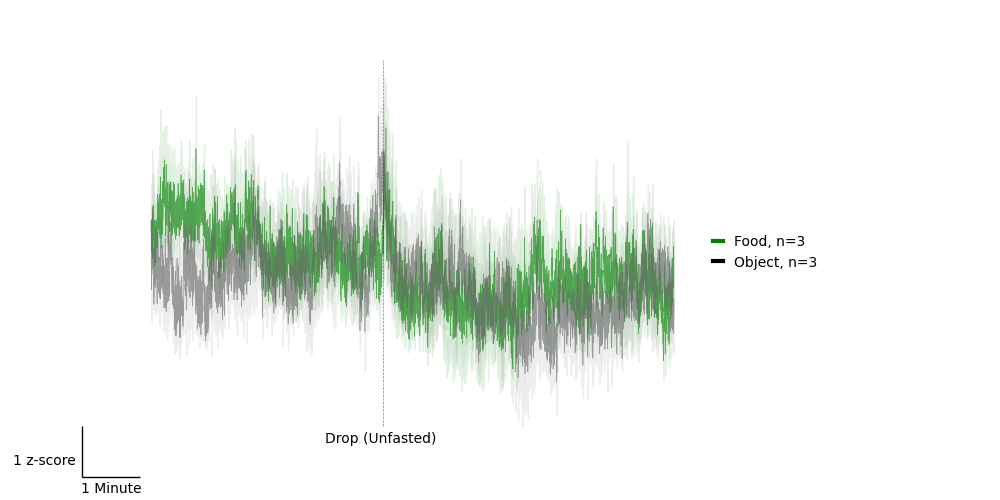

In [4]:
#Unfasted 

behaviorfileending = '/FoodDropData.h5'
dff, initmean, fsem = group_analysis(food_drop_unfasted, behaviorfileending, shade='sem')
fmean = initmean[:-1]
dff = dff.dropna()
fsem = fsem[:-1]


behaviorfileending = '/ObDropData.h5'
odf, initmean, osem = group_analysis(ob_drop_unfasted, behaviorfileending, shade='sem')
omean = initmean[:-1]
odf = odf.dropna()
osem = osem[:-1]


fig, ax = plt.subplots(1, figsize=(10,5))

view_window=[-240, 300]
ftime = np.linspace(view_window[0], view_window[1], num=len(fmean))
fmean = fmean
ax.plot(ftime, fmean, linewidth=0.5, color='green', alpha=0.6)
ax.fill_between(ftime, fmean-fsem, fmean+fsem, color='green', alpha=0.1)
fn = len(dff.columns)

otime = np.linspace(view_window[0], view_window[1], num=len(omean))
omean = omean - 0.3
ax.plot(otime, omean, linewidth=0.5, color='dimgray', alpha=0.6)
ax.fill_between(otime, omean-osem, omean+osem, color='dimgray', alpha=0.1)
on = len(odf.columns)



legend_elements = [Line2D([0], [0], color = 'green', lw=3, label=f'Food, n={fn}'), Line2D([0], [0], color = 'black', lw=3, label=f'Object, n={on}')]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, handlelength=0.75, handleheight=1, edgecolor=None)
fig.subplots_adjust(right=0.7)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.axvline(0, ymin=0.05, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
ax.text(-60, -3.75, 'Drop (Unfasted)')
#plt.suptitle('Onset of Feeding Bout',x=0.45, y=0.95)
sb = add_scalebar(ax, matchx=False, sizex=60, labelx='1 Minute', matchy=False, sep=4, sizey=1, labely='1 z-score',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))













In [ ]:
#------------- COMBO PLOT OF DROPS 

In [ ]:
from matplotlib.lines import Line2D


fig, ax = plt.subplots(1, figsize=(10,5))


#FASTED FOOD DROP 
behaviorfileending = '/FoodDropData.h5'
ffddf, initmean, sem = group_analysis(food_drop_fasted, behaviorfileending, shade='sem')
ffdmean = initmean[:-1]
ffddf = ffddf.dropna()
ffdsem = sem[:-1]


#UNFASTED FOOD DROP 
behaviorfileending = '/FoodDropData.h5'
ufddf, initmean, sem = group_analysis(food_drop_unfasted, behaviorfileending, shade='sem')
ufdmean = initmean[:-1]
ufddf = ufddf.dropna()
ufdsem = sem[:-1]

#OBJECT DROP 
behaviorfileending = '/ObDropData.h5'
obdf, initmean, sem = group_analysis(ob_drop_fasted, behaviorfileending, shade='sem')
obmean = initmean[:-1]
obdf = obdf.dropna()
obsem = sem[:-1]

view_window=[-30, 75]
ftime = np.linspace(view_window[0], view_window[1], num=len(ffdmean))
utime = np.linspace(view_window[0], view_window[1], num=len(ufdmean))
otime = np.linspace(view_window[0], view_window[1], num=len(obmean))

ax.plot(ftime, ffdmean, linewidth=0.5, color='indigo', alpha=0.6)
ax.fill_between(ftime, ffdmean-ffdsem, ffdmean+ffdsem, color='indigo', alpha=0.1)
ffd_n = len(ffddf.columns)

ax.plot(utime, ufdmean, linewidth=0.5, color='dodgerblue', alpha=0.6)
ax.fill_between(utime, ufdmean-ufdsem, ufdmean+ufdsem, color='dodgerblue', alpha=0.1)
ufd_n = len(ufddf.columns)

ax.plot(otime, obmean, linewidth=0.5, color='green', alpha=0.6)
ax.fill_between(otime, obmean-obsem, obmean+obsem, color='green', alpha=0.1)
ob_n = len(obdf.columns)



hl_list = [handle_label for handle_label in ax.get_legend_handles_labels()]
legend_elements = [Line2D([0], [0], color = 'indigo', lw=3, label=f'Fasted Food Drop, n={ffd_n}'),
                   Line2D([0], [0], color = 'dodgerblue', lw=3, label=f'Unfasted Food Drop, n={ufd_n}'),
                   Line2D([0], [0], color = 'green', lw=3, label=f'Object Drop, n={ob_n}')]

ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, handlelength=0.75, handleheight=1, edgecolor=None)
fig.subplots_adjust(right=0.7)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.axvline(0, ymin=0.05, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
#ax.axvline(240, ymin=0.05, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
#ax.text(0, -2, '0')
#ax.text(150, -2, '4 min')
#plt.suptitle('Offset of Micromovement Bout During Immobility',x=0.35, y=0.95)
sb = add_scalebar(ax, matchx=False, sizex=10, labelx='10 seconds', matchy=False, sep=4, sizey=1, labely='1 z-score',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))


In [ ]:
#--------------------- TEA BALL DROP 

In [ ]:
for path in paths:
    signal = np.load(f'{path}/signal.npy')
    isos = np.load(f'{path}/isos.npy')
    time = np.load(f'{path}/time.npy')
    streamrate = np.load(f'{path}/streamrate.npy')
    inaccessible = [inaccessible_food[path] - 5]
    accessible = [accessible_food[path] - 5]

    smooth_signal = moving_average(signal)
    smooth_isos = moving_average(isos)
    ds_time = time[::int(streamrate/10)]
    ds_signal = smooth_signal[::int(streamrate/10)]
    ds_isos = smooth_isos[::int(streamrate/10)]

    scaled_isos = linear_fitting(ds_isos, ds_signal, 'simple')
    dFF = delta_FF(scaled_isos, ds_signal, method='unstandardized')
    zdFF = normalize_channel(dFF, ds_time, method='mean')
    
    #ds_time, zdFF = airPLS_analysis(time, isos, signal, ds=int(streamrate/10))
    
    savepath = f'{path}/TeaBallData.h5'
    df, mean, sem = event_analysis(time=ds_time, data=zdFF, epochs=inaccessible,shade='sem', saveresults=True, savepath=savepath, method='baseline_subtraction', baseline_start=-20, baseline_end=-10, view_window=[-300, 2400])
    fig, ax = plt.subplots(figsize=(8,5)) 
    visualize_event(ax, df, mean, sem, f'{path.rsplit("/")[-1]}', [-300, 2400])
    ax.set_xticks([-300, 0, 300, 600, 900, 1200, 1500, 1800, 2100, 2400])
    ax.set_xticklabels([-5, 0, 5, 10, 15, 20, 25, 30, 35, 40])
    ax.set_xlabel('Minutes')
    ax.axvline(1200, ymin=0.05, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
    

In [ ]:

behaviorfileending = '/TeaBallData.h5'

df, initmean, sem = group_analysis(paths, behaviorfileending, shade='sem')
mean = initmean[:-1]
df = df.dropna()
sem = sem[:-1]

In [ ]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(10,5))

view_window=[-300, 2400]
time = np.linspace(view_window[0], view_window[1], num=len(mean))
mean = mean
ax.plot(time, mean, linewidth=0.5, color='green', alpha=0.6)
ax.fill_between(time, mean-sem, mean+sem, color='green', alpha=0.1)
n = len(df.columns)

legend_elements = [Line2D([0], [0], color = 'green', lw=3, label=f'GCaMP, n={n}')]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, handlelength=0.75, handleheight=1, edgecolor=None)
fig.subplots_adjust(right=0.7)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.axvline(0, ymin=0.15, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
ax.axvline(1200, ymin=0.15, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
ax.text(-120, -3.55, 'Inaccessible')
ax.text(1000, -3.55, 'Accessible')
#plt.suptitle('Onset of Feeding Bout',x=0.45, y=0.95)
sb = add_scalebar(ax, matchx=False, sizex=300, labelx='5 minutes', matchy=False, sep=4, sizey=1, labely='1 z-score',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))


